In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [8]:
# 1. Read the dataset and do necessary preprocessing
# Replace "BankNote_Authentication.csv" with your file path if needed
df = pd.read_csv("Banknote_Authentication.csv")

# --- Data Imputation for missing values ---
imputer = SimpleImputer(strategy="mean")
df[df.columns] = imputer.fit_transform(df)

# --- Encoding: convert categorical columns to numerical (if any) ---
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Assume the dataset columns are:
# [feature1, feature2, feature3, feature4, class]
# Where the last column is the label
X = df.iloc[:, :-1].values  # independent variables
y = df.iloc[:, -1].values   # dependent variable (class)

# Add bias (intercept) term to X
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
print("URK22CS7048")
print("First 5 rows of the dataset after preprocessing:")
print(df.head())

print("\nShape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)

URK22CS7048
First 5 rows of the dataset after preprocessing:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699    0.0
1   4.54590    8.1674   -2.4586 -1.46210    0.0
2   3.86600   -2.6383    1.9242  0.10645    0.0
3   3.45660    9.5228   -4.0112 -3.59440    0.0
4   0.32924   -4.4552    4.5718 -0.98880    0.0

Shape of X (features): (1372, 5)
Shape of y (labels): (1372,)


In [7]:
# 2. Train a logistic regression model using gradient descent
#    and determine the epoch with minimum error.
# We compute error as Mean Squared Error (MSE) on the output probability.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

epochs = 100    # total epochs to train
lr = 0.1        # learning rate (adjustable)

errors = []         # to store error at each epoch
weights_history = []  # to store weight vector at each epoch
weights = np.zeros(X.shape[1])  # initialize weights

for epoch in range(epochs):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    
    # Error (difference between predicted probability and actual label)
    error = predictions - y
    
    # Compute Mean Squared Error (MSE) for reporting convergence
    cost = np.mean(error ** 2)
    errors.append(cost)
    weights_history.append(weights.copy())
    
    # Compute gradient and update weights
    gradient = np.dot(X.T, error) / X.shape[0]
    weights = weights - lr * gradient
print("URK22CS7048")
print(f"Minimum error occurs at epoch: {errors.index(min(errors))}")


URK22CS7048
Minimum error occurs at epoch: 99


In [6]:

# 3. Determine the epoch with minimum error and print the weights.
min_epoch = np.argmin(errors)
print("URK22CS7048")
print("Epoch with minimum error:", min_epoch)
print("Minimum Error:", errors[min_epoch])
print("Final weight of each attribute at epoch {}: {}".format(min_epoch, weights_history[min_epoch]))

URK22CS7048
Epoch with minimum error: 99
Minimum Error: 0.024801126982276878
Final weight of each attribute at epoch 99: [ 0.53310666 -1.18314918 -0.63006382 -0.65145548 -0.26326875]


URK22CS7048


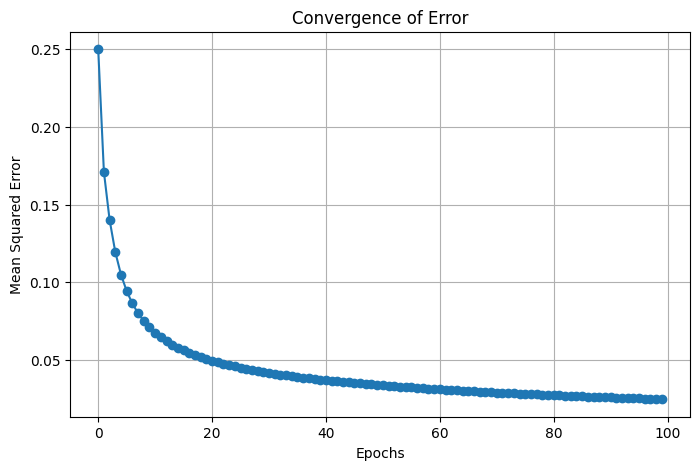

In [9]:
# 4. Plot the convergence of error for each iteration (epoch)
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), errors, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Convergence of Error")
plt.grid(True)
print("URK22CS7048")
plt.show()